In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import os


In [ ]:
# Чтение CSV файла в DataFrame
df = pd.read_csv('air.csv', error_bad_lines=False)


for column in df.columns:
    if df[column].dtype == object:  # Проверяем, является ли столбец строковым
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Преобразуем в числовой формат
        mean_value = df[column].mean()  # Вычисляем среднее значение
        df[column].fillna(mean_value, inplace=True)  # Заменяем NaN на среднее значение

validation = df[4000:len(df)]

<ipython-input-26-ed791f1ab3f3>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('air.csv', error_bad_lines=False)
Skipping line 69: expected 14 fields, saw 16
Skipping line 96: expected 14 fields, saw 16
Skipping line 97: expected 14 fields, saw 16
Skipping line 119: expected 14 fields, saw 16
Skipping line 120: expected 14 fields, saw 16
Skipping line 121: expected 14 fields, saw 16
Skipping line 140: expected 14 fields, saw 16
Skipping line 141: expected 14 fields, saw 16
Skipping line 142: expected 14 fields, saw 16
Skipping line 143: expected 14 fields, saw 16
Skipping line 144: expected 14 fields, saw 16
Skipping line 145: expected 14 fields, saw 16
Skipping line 146: expected 14 fields, saw 16
Skipping line 164: expected 14 fields, saw 16
Skipping line 165: expected 14 fields, saw 16
Skipping line 166: expected 14 fields, saw 16
Skipping line 167: expected 14 fields, s

In [ ]:
validation

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DAQI
4000,1.3,1009,-200,7.1,860,287,787,172,993,922,10.6,34.2,0.4375,57.7
4001,1.0,1007,-200,7.6,884,278,780,163,1014,951,8.9,38.1,0.4341,56.5
4002,1.5,1054,-200,10.4,992,302,715,180,1092,1051,7.8,39.7,0.4206,58.2
4003,1.5,1018,-200,8.9,934,259,740,169,1014,967,7.3,42.2,0.4341,56.2
4004,1.2,976,-200,7.3,870,221,795,152,971,861,6.9,42.5,0.4257,54.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,0.5,888,-200,1.3,528,77,1077,53,987,578,10.4,59.9,0.7550,51.7
5411,1.1,1031,-200,4.4,730,182,760,93,1129,905,9.5,63.1,0.7531,53.9
5412,4.0,1384,-200,17.4,1221,594,470,155,1600,1457,9.7,61.9,0.7446,67.1
5413,5.0,1446,-200,22.4,1362,586,415,174,1777,1705,13.5,48.9,0.7553,75.9


Вычисления начинаются с 10.03.2004 18:00:00 С интервалом в час

In [ ]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DAQI
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,65.5
1,2.1,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,62.7
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,60.9
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,60.2
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,57.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,0.5,888,-200,1.3,528,77,1077,53,987,578,10.4,59.9,0.7550,51.7
5411,1.1,1031,-200,4.4,730,182,760,93,1129,905,9.5,63.1,0.7531,53.9
5412,4.0,1384,-200,17.4,1221,594,470,155,1600,1457,9.7,61.9,0.7446,67.1
5413,5.0,1446,-200,22.4,1362,586,415,174,1777,1705,13.5,48.9,0.7553,75.9


In [ ]:
def data_split(ts, param="13", train_percentage=0.67):
    timeseries = ts[ts.columns[int(param)]].values.astype('float32')
    train_size = int(len(timeseries) * train_percentage)
    train, test = timeseries[:train_size], timeseries[train_size:]
    return train, test, timeseries

In [ ]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [ ]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [ ]:
train, test, total = data_split(df)
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

<ipython-input-8-7cf0772f622e>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.tensor(X), torch.tensor(y)


In [ ]:
import numpy as np
import torch.optim as optim
import torch.utils.data as torch_data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = torch_data.DataLoader(torch_data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

EPOCHS = 200

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, n_epochs):
    y_pred_train = None
    y_pred_test = None

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        # Validation
        with torch.no_grad():
            y_pred = model(X_train)
            y_pred_train = y_pred
            train_rmse = np.sqrt(loss_fn(y_pred, y_train))
            y_pred = model(X_test)
            y_pred_test = y_pred
            test_rmse = np.sqrt(loss_fn(y_pred, y_test))
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))



    return y_pred_train, y_pred_test, model

In [ ]:
y_pred_train, y_pred_test, model = train_model(model, X_train, X_test, y_train, y_test, EPOCHS)

Epoch 0: train RMSE 108.3149, test RMSE 87.0183
Epoch 1: train RMSE 102.1657, test RMSE 80.8100
Epoch 2: train RMSE 98.4069, test RMSE 77.3609
Epoch 3: train RMSE 95.6678, test RMSE 75.0638
Epoch 4: train RMSE 93.4174, test RMSE 73.3540
Epoch 5: train RMSE 91.6725, test RMSE 72.0948
Epoch 6: train RMSE 90.0959, test RMSE 70.9835
Epoch 7: train RMSE 88.5915, test RMSE 69.8515
Epoch 8: train RMSE 87.1160, test RMSE 68.7760
Epoch 9: train RMSE 85.5920, test RMSE 67.4160
Epoch 10: train RMSE 84.3479, test RMSE 66.1848
Epoch 11: train RMSE 82.8535, test RMSE 64.9385
Epoch 12: train RMSE 81.2440, test RMSE 63.5354
Epoch 13: train RMSE 79.9346, test RMSE 62.3773
Epoch 14: train RMSE 78.2715, test RMSE 61.0696
Epoch 15: train RMSE 76.9448, test RMSE 59.8913
Epoch 16: train RMSE 75.4523, test RMSE 58.6958
Epoch 17: train RMSE 74.0493, test RMSE 57.5503
Epoch 18: train RMSE 72.6543, test RMSE 56.4251
Epoch 19: train RMSE 71.3542, test RMSE 55.3229
Epoch 20: train RMSE 70.0096, test RMSE 54.2380


In [ ]:
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            r2_score)
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validate(true, pred):
    true = pd.DataFrame(true.flatten().numpy())[0]
    pred = pd.DataFrame(pred.flatten().numpy())[0]
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("MAPE:", mean_absolute_percentage_error(true, pred))
    print("R2:", r2_score(true, pred))

In [ ]:
def plot_train_n_pred(X_train, X_test, total, model):
    with torch.no_grad():
    # shift train predictions for plotting
        train_plot = np.ones_like(total) * np.nan
        y_pred = model(X_train)
        y_pred = y_pred[:, -1]
        train_size = len(X_train)
        train_plot[lookback:train_size + 1] = model(X_train)[:, -1]
        # shift test predictions for plotting
        test_plot = np.ones_like(total) * np.nan
        test_plot[train_size + lookback:len(total) - 1] = model(X_test)[:, -1]

    plt.rcParams["figure.figsize"] = [50, 12]
    plt.plot(total, c='b')
    plt.plot(train_plot, c='r')
    plt.plot(test_plot, c='g')
    plt.show()

In [ ]:
def validate_on_auto_measurement(model):
    valid_train, valid_test, valid_total = data_split(validation)
    lookback = 1
    X_train, _ = create_dataset(valid_train, lookback=lookback)
    X_test, y_test = create_dataset(valid_test, lookback=lookback)

    y_pred = model(X_test)
    y_pred_test = y_pred

    print(f"Метрики для автоматического измерения:")
    try:
        validate(y_pred_test, y_test)
    except:
        validate(y_pred_test.detach(), y_test.detach())
    plot_train_n_pred(X_train, X_test, valid_total, model)

Метрики для автоматического измерения:
MSE: 788.22235
RMSE: 28.075297880418272
MAE: 5.2050133
MAPE: 6.931260973215103
R2: -0.9989336453453781


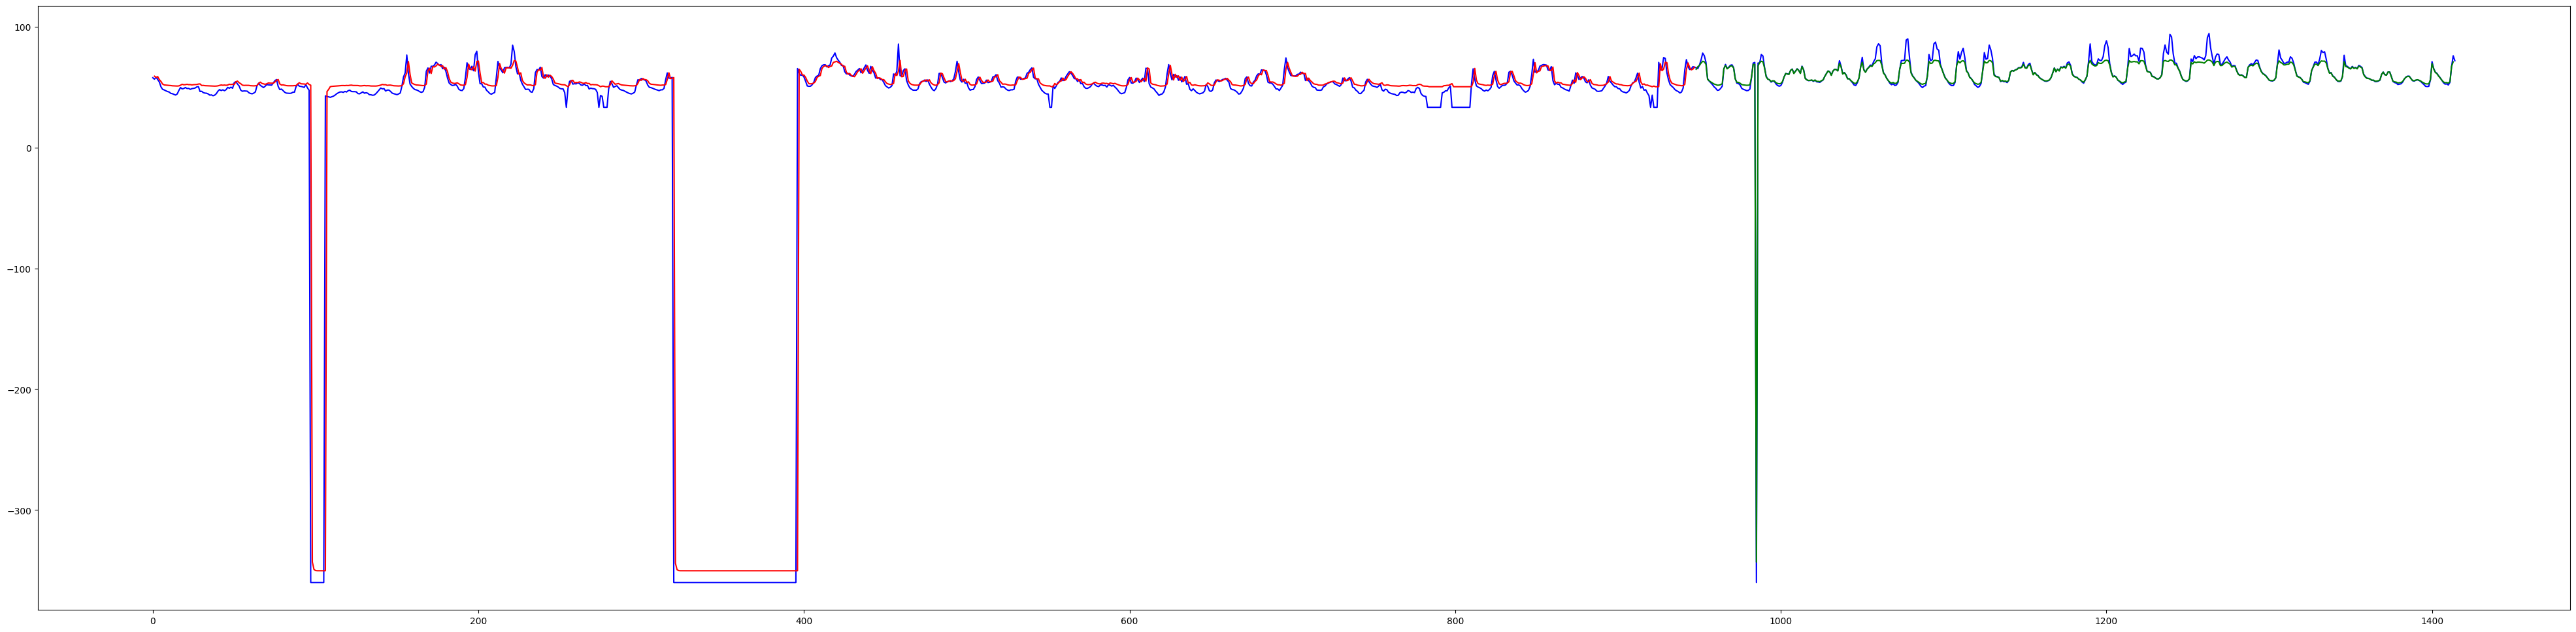

In [ ]:
validate_on_auto_measurement(model)